<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/AugmentData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from PIL import Image, ImageChops

Original


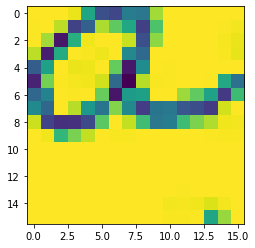

Blur


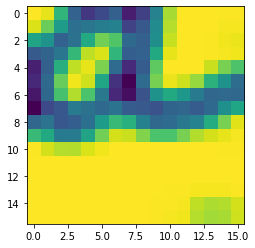

Rotate 30*


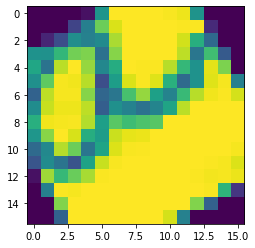

Rotate -30*


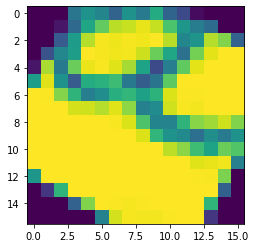

In [ ]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 3.0, -100)
    bbox = diff.getbbox()
    return im.crop(bbox)

img = Image.open("/content/drive/MyDrive/Dataset/Dataset/a/10321.jpg").convert('LA')
img = trim(img).resize((16,16))
img = np.asarray(img)[:,:,0]

print('Original')
plt.imshow(img)
plt.show()

print('Blur')
b = cv2.blur(img,(3,3))
plt.imshow(b)
plt.show()

print('Rotate 30*')
r1 = cv2.getRotationMatrix2D((img.shape[0]/2,img.shape[1]/2),30,1)
r1 = cv2.warpAffine(img,r1,(img.shape[0],img.shape[1]))
plt.imshow(r1)
plt.show()

print('Rotate -30*')
r2 = cv2.getRotationMatrix2D((img.shape[0]/2,img.shape[1]/2),-30,1)
r2 = cv2.warpAffine(img,r2,(img.shape[0],img.shape[1]))
plt.imshow(r2)
plt.show()

In [ ]:
def Add_Train_Vali(path, l, flag):
  global X_train, Y_train, X_vali, Y_vali, X_test, Y_test,count
  list_file = os.listdir(path)
  list_file = [path+list_file[i] for i in range(len(list_file))]
  labels = [l for i in range(len(list_file))]
  for i in list_file:
    img = Image.open(i).convert('LA')
    img = trim(img).resize((16,16))
    img = np.asarray(img)[:,:,0]

    b = cv2.blur(img,(3,3))
    r1 = cv2.getRotationMatrix2D((img.shape[0]/2,img.shape[1]/2),30,1)
    r1 = cv2.warpAffine(img,r1,(img.shape[0],img.shape[1]))
    r2 = cv2.getRotationMatrix2D((img.shape[0]/2,img.shape[1]/2),-30,1)
    r2 = cv2.warpAffine(img,r2,(img.shape[0],img.shape[1]))

    img = hog(img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False) # Xử lý ảnh với hog
    b = hog(b, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False) # Xử lý ảnh với hog
    r1 = hog(r1, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False) # Xử lý ảnh với hog
    r2 = hog(r2, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False) # Xử lý ảnh với hog
    
    if flag==1:
      X_train.append(img)
      X_train.append(b)
      X_train.append(r1)
      X_train.append(r2)
      Y_train+=[l,l,l,l]
    if flag==0:
      X_vali.append(img)
      X_vali.append(b)
      X_vali.append(r1)
      X_vali.append(r2)
      Y_vali+=[l,l,l,l]
    if flag==-1:
      X_test.append(img)
      X_test.append(b)
      X_test.append(r1)
      X_test.append(r2)
      Y_test+=[l,l,l,l]

In [ ]:
datatrain_Path = '/content/drive/MyDrive/Dataset/train/'
list_label = os.listdir(datatrain_Path)
list_label = sorted(list_label)
dic = {list_label[i]:i for i in range(len(list_label))}
X_train = []
Y_train = []
X_vali = []
Y_vali = []
X_test = []
Y_test = []


In [ ]:
count=0
for i in list_label:
  Add_Train_Vali(datatrain_Path+i+'/',dic[i],1)

In [ ]:
import pandas as pd
np_sample = X_train
pd.DataFrame(np_sample).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/X_train_augment_hog_16x16.csv',  header=None, index=None)
np_sample = Y_train
pd.DataFrame(np_sample).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/Y_train_augment_hog_16x16.csv',  header=None, index=None)

In [ ]:
datavali_Path = '/content/drive/MyDrive/Dataset/validation/'
count=0
for i in list_label:
  Add_Train_Vali(datavali_Path+i+'/',dic[i],0)

In [ ]:
np_sample = X_vali
pd.DataFrame(np_sample).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/X_vali_augment_hog_16x16.csv',  header=None, index=None)
np_sample = Y_vali
pd.DataFrame(np_sample).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/Y_vali_augment_hog_16x16.csv',  header=None, index=None)

In [ ]:
datatest_Path = '/content/drive/MyDrive/Dataset/TestingData/'
count=0
for i in list_label:
  Add_Train_Vali(datatest_Path+i+'/',dic[i],-1)

In [ ]:
np_sample = X_test
pd.DataFrame(np_sample).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/X_test_augment_hog_16x16.csv',  header=None, index=None)
np_sample = Y_test
pd.DataFrame(np_sample).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/Y_test_augment_hog_16x16.csv',  header=None, index=None)

In [ ]:
print(len(X_train))
print(len(Y_train))
print(len(X_vali))
print(len(Y_vali))
print(len(X_test))
print(len(Y_test))

47460
47460
11936
11936
11032
11032
